# Water Demands prediction
###### Latifa Binsaeed
###### Jana Bin Ekresh

## Dataset Overview: United Utilities Water Management (Water Demand)
The dataset originates from United Utilities, which is responsible for water and wastewater management in the North West of England. As a utility provider, United Utilities aims to deliver water efficiently to the northwest. Their mission is to provide high-quality water and wastewater services to customers in the region.United Utilities is not only focused on providing essential water services but also on embracing sustainable practices and exploring innovative solutions to meet the growing demand for water. 

The dataset provided help in understanding water demand patterns, which are critical for optimizing water supply, managing resources, and supporting future planning.

# Importing Libraries

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn  as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


import warnings
warnings.filterwarnings('ignore')

## Dataset Description
This dataset consists of 140,086 rows across 9 columns, all of which are  variables representing different aspects of water demand and flow across the regions of United Utilities. 

- **Date:** The date on which the data was recorded. This column has 140,086 non-null entries. Every entry in this column corresponds to a certain day or timestamp.

- **Longridge_Netflow_Stored:** The stored net flow of water for the Longridge region. It has 125,100 non-null entries, with some missing values.

- **Preston_Road_Netflow_Stored:** The stored net flow of water for the Preston Road region. It contains 138,168 non-null entries, with fewer missing values.

- **Whittingham_Road_Netflow_Stored:** Net-flow-of-water stored for the region Whittingham Road, which contains 127,746 non-null entries, contains missing data.

- **Ribchester_Village_Netflow_Stored:** The net flow of water stored for Ribchester Village, and it contained 84,641 non-null entries. This column has more proportion missing values than others.

- **Tan_Yard_Lane_Netflow_Stored:** The stored net flow of water for Tan Yard Lane, with 135,442 non-null entries, with fewer missing values.

- **Ribble_Farm_Flow_With_Edits:** The flow of water for Ribble Farm, with 28,915 non-null entries, and has many missing data points.

- **No_Customer_Flow_With_Edits:** Flow of water no customer edits, 32,184 non-null entries. This column concerns measurements of water flow with no edits that involved any adjustments based on customer data.

- **Talbot_Co_Flow_With_Edits:** The water flow for Talbot Co, which has 116,500 non-null entries4. this column represents water flow with a few edits corrected for Talbot Co and fewer missing entries.

## Data Source
https://www.kaggle.com/datasets/muzammalnawaz/united-utilities-water-management-water-demand/data

# Loading the Dataset into a Pandas Dataframe

In [13]:
df = pd.read_csv(r"/Users/latifabinsaeed/Desktop/netbase_inlet-outlet-cont_logged_user_April2018.csv")
df.head()

,Date,074-01 : \nLongridge : \nNetflow Stored \n(l/s),"074-03 : \nPreston Road, \nLongridge : \nNetflow Stored \nMinus Cont \nLogged (l/s)",074-04 : \nWhittingham \nRoad : Netflow \nStored (l/s),074-11 : \nRibchester \nVillage : \nNetflow Stored \nMinus Cont \nLogged (l/s),074-02 : Tan \nYard Lane : \nNetflow Stored \n(l/s),[Continuous] \nMeter : \n207330265 : MR \nCOULSTON T/A \nRIBBLE FARM \nFAYRE : Flow \nWith Edits \n(l/s),[Continuous] \nMeter : 6924916 \n: NO CUSTOMER : \nFlow With Edits \n(l/s),[Continuous] \nMeter : 5680357 \n: F TALBOT & CO \n: Flow With \nEdits (l/s)
0,1/4/2018 0:00,-3.370818,4.622,12.244,NaN,8.889,NaN,NaN,0.044
1,1/4/2018 0:15,-3.286014,4.211,12.711,NaN,8.889,NaN,NaN,0.033
2,1/4/2018 0:30,-1.771281,3.644,10.978,NaN,8.556,NaN,NaN,0.033
3,1/4/2018 0:45,-1.574651,3.578,10.622,NaN,8.333,NaN,NaN,0.022
4,1/4/2018 1:00,-0.593511,3.422,9.622,NaN,8.111,NaN,NaN,0.044


# Overview of the Dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140086 entries, 0 to 140085
Data columns (total 9 columns):
 #   Column                                                                                             Non-Null Count   Dtype  
---  ------                                                                                             --------------   -----  
 0    Date                                                                                              140086 non-null  object 
 1   074-01 : 
Longridge : 
Netflow Stored 
(l/s)                                                       125100 non-null  float64
 2   074-03 : 
Preston Road, 
Longridge : 
Netflow Stored 
Minus Cont 
Logged (l/s)                     138168 non-null  float64
 3   074-04 : 
Whittingham 
Road : Netflow 
Stored (l/s)                                                127746 non-null  float64
 4   074-11 : 
Ribchester 
Village : 
Netflow Stored 
Minus Cont 
Logged (l/s)                          84641 non-nu

# As we see, the column names are not understandable, Let's change them

In [17]:
import pandas as pd

df.columns = df.columns.str.replace(r'\n', ' ')  # Replace \n with spaces
df.columns = df.columns.str.strip()  # Remove lwhite space
df.columns = df.columns.str.replace(r'[^A-Za-z0-9_ ]', '', regex=True)  # Remove special characters

In [18]:
# Example: You can also manually rename some columns for clarity
df.rename(columns={
    '07401  Longridge  Netflow Stored ls': 'Longridge_Netflow_Stored',
    '07403  Preston Road Longridge  Netflow Stored Minus Cont Logged ls': 'Preston_Road_Netflow_Stored',
    '07404  Whittingham Road  Netflow Stored ls': 'Whittingham_Road_Netflow_Stored',
    '07411  Ribchester Village  Netflow Stored Minus Cont Logged ls': 'Ribchester_Village_Netflow_Stored',
    '07402  Tan Yard Lane  Netflow Stored ls': 'Tan_Yard_Lane_Netflow_Stored',
    'Continuous Meter  207330265  MR COULSTON TA RIBBLE FARM FAYRE  Flow With Edits ls': 'Ribble_Farm_Flow_With_Edits',
    'Continuous Meter  6924916  NO CUSTOMER  Flow With Edits ls': 'No_Customer_Flow_With_Edits',
    'Continuous Meter  5680357  F TALBOT  CO  Flow With Edits ls': 'Talbot_Co_Flow_With_Edits'
}, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140086 entries, 0 to 140085
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               140086 non-null  object 
 1   Longridge_Netflow_Stored           125100 non-null  float64
 2   Preston_Road_Netflow_Stored        138168 non-null  float64
 3   Whittingham_Road_Netflow_Stored    127746 non-null  float64
 4   Ribchester_Village_Netflow_Stored  84641 non-null   float64
 5   Tan_Yard_Lane_Netflow_Stored       135442 non-null  float64
 6   Ribble_Farm_Flow_With_Edits        28915 non-null   float64
 7   No_Customer_Flow_With_Edits        32184 non-null   float64
 8   Talbot_Co_Flow_With_Edits          116500 non-null  float64
dtypes: float64(8), object(1)
memory usage: 9.6+ MB


In [20]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M') #change date format

# Checking for Null values

In [22]:
df.isna().sum()

Date                                      0
Longridge_Netflow_Stored              14986
Preston_Road_Netflow_Stored            1918
Whittingham_Road_Netflow_Stored       12340
Ribchester_Village_Netflow_Stored     55445
Tan_Yard_Lane_Netflow_Stored           4644
Ribble_Farm_Flow_With_Edits          111171
No_Customer_Flow_With_Edits          107902
Talbot_Co_Flow_With_Edits             23586
dtype: int64

In [23]:
# backward-fill missing value ( fill empty with next entries value )
df.fillna(method='bfill', inplace=True)
df.isna().sum()

Date                                   0
Longridge_Netflow_Stored             237
Preston_Road_Netflow_Stored            0
Whittingham_Road_Netflow_Stored       34
Ribchester_Village_Netflow_Stored     43
Tan_Yard_Lane_Netflow_Stored         237
Ribble_Farm_Flow_With_Edits           44
No_Customer_Flow_With_Edits           45
Talbot_Co_Flow_With_Edits             41
dtype: int64

In [24]:
df = df.dropna()
df.isna().sum()

Date                                 0
Longridge_Netflow_Stored             0
Preston_Road_Netflow_Stored          0
Whittingham_Road_Netflow_Stored      0
Ribchester_Village_Netflow_Stored    0
Tan_Yard_Lane_Netflow_Stored         0
Ribble_Farm_Flow_With_Edits          0
No_Customer_Flow_With_Edits          0
Talbot_Co_Flow_With_Edits            0
dtype: int64

In [25]:
#check number of negative values 
print((df['Longridge_Netflow_Stored'] < 0).sum())
print((df['Preston_Road_Netflow_Stored'] < 0).sum())
print((df['Whittingham_Road_Netflow_Stored'] < 0).sum())
print((df['Ribchester_Village_Netflow_Stored'] < 0).sum())
print((df['Tan_Yard_Lane_Netflow_Stored'] < 0).sum())

1941
573
0
13
7361


In [26]:
df.head()

,Date,Longridge_Netflow_Stored,Preston_Road_Netflow_Stored,Whittingham_Road_Netflow_Stored,Ribchester_Village_Netflow_Stored,Tan_Yard_Lane_Netflow_Stored,Ribble_Farm_Flow_With_Edits,No_Customer_Flow_With_Edits,Talbot_Co_Flow_With_Edits
0,2018-04-01 00:00:00,-3.370818,4.622,12.244,4.666,8.889,0.01,1.878,0.044
1,2018-04-01 00:15:00,-3.286014,4.211,12.711,4.666,8.889,0.01,1.878,0.033
2,2018-04-01 00:30:00,-1.771281,3.644,10.978,4.666,8.556,0.01,1.878,0.033
3,2018-04-01 00:45:00,-1.574651,3.578,10.622,4.666,8.333,0.01,1.878,0.022
4,2018-04-01 01:00:00,-0.593511,3.422,9.622,4.666,8.111,0.01,1.878,0.044


In [27]:
# remove any negative values, they shouldn't exist


df = df[df['Longridge_Netflow_Stored'] >= 0]  
df = df[df['Preston_Road_Netflow_Stored'] >= 0]  
df = df[df['Whittingham_Road_Netflow_Stored'] >= 0] 
df = df[df['Ribchester_Village_Netflow_Stored'] >= 0]  
df = df[df['Tan_Yard_Lane_Netflow_Stored'] >= 0]  

In [28]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,129975,2020-03-28 22:19:06.425851136,2018-04-01 02:30:00,2019-03-13 23:52:30,2020-03-16 23:30:00,2021-04-12 02:07:30,2022-03-27 18:00:00,NaN
Longridge_Netflow_Stored,129975.0,11.504196,0.000747,6.607646,10.961618,14.637157,74.232765,6.078338
Preston_Road_Netflow_Stored,129975.0,6.261941,0.001,4.089,6.689,8.001,24.92,2.257568
Whittingham_Road_Netflow_Stored,129975.0,7.358725,0.0,4.0,7.867,9.9,25.322,4.294874
Ribchester_Village_Netflow_Stored,129975.0,3.729803,0.0,3.0,4.189,4.666,7.422,1.155806
Tan_Yard_Lane_Netflow_Stored,129975.0,9.071538,0.0,7.122,8.822,10.556,74.134,3.305236
Ribble_Farm_Flow_With_Edits,129975.0,0.03982,0.004,0.01,0.01,0.01,0.524,0.081936
No_Customer_Flow_With_Edits,129975.0,1.476269,0.0,1.878,1.878,1.878,2.6,0.741365
Talbot_Co_Flow_With_Edits,129975.0,0.412318,0.0,0.178,0.4,0.578,4.178,0.238566


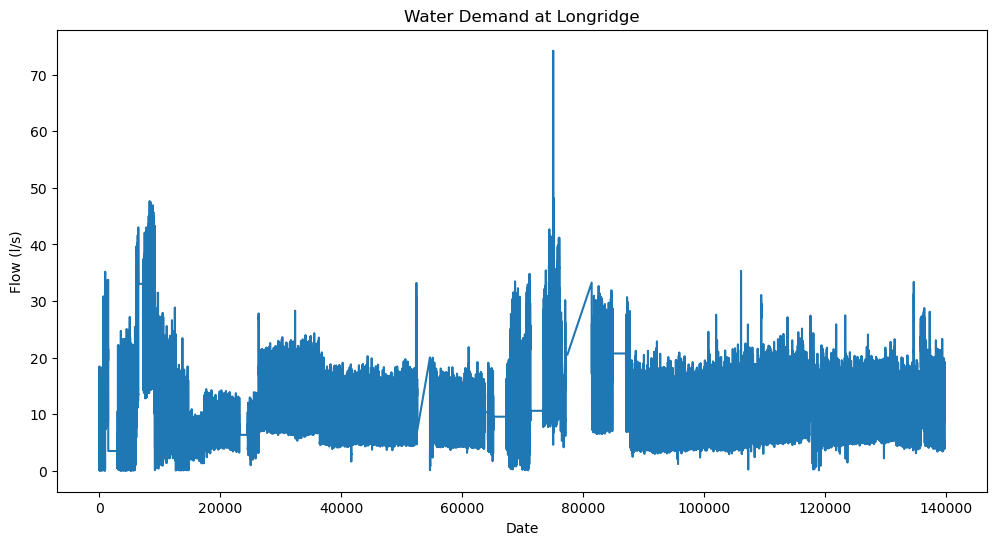

In [29]:
import matplotlib.pyplot as plt

df['Longridge_Netflow_Stored'].plot(figsize=(12,6))
plt.title('Water Demand at Longridge')
plt.xlabel('Date')
plt.ylabel('Flow (l/s)')
plt.show()

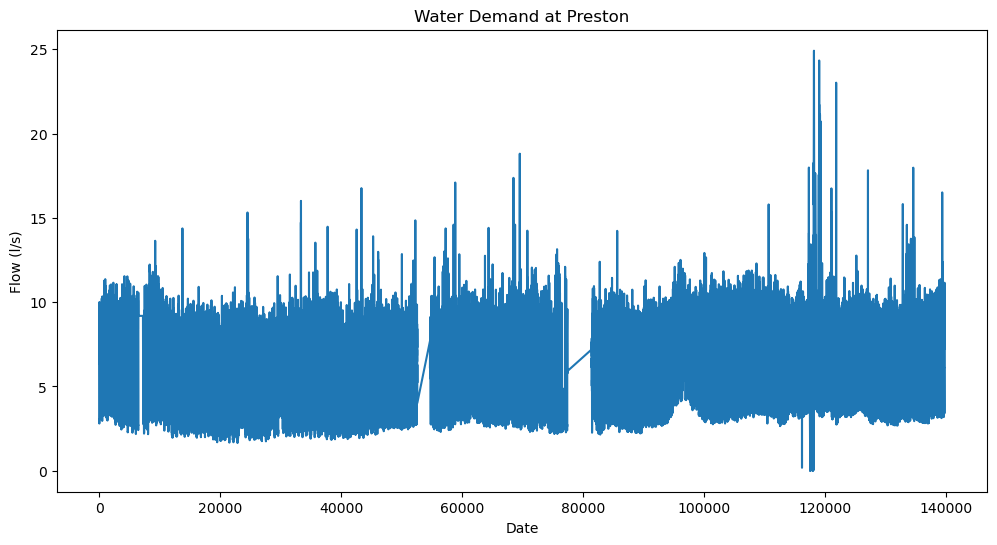

In [30]:
df['Preston_Road_Netflow_Stored'].plot(figsize=(12,6))
plt.title('Water Demand at Preston')
plt.xlabel('Date')
plt.ylabel('Flow (l/s)')
plt.show()

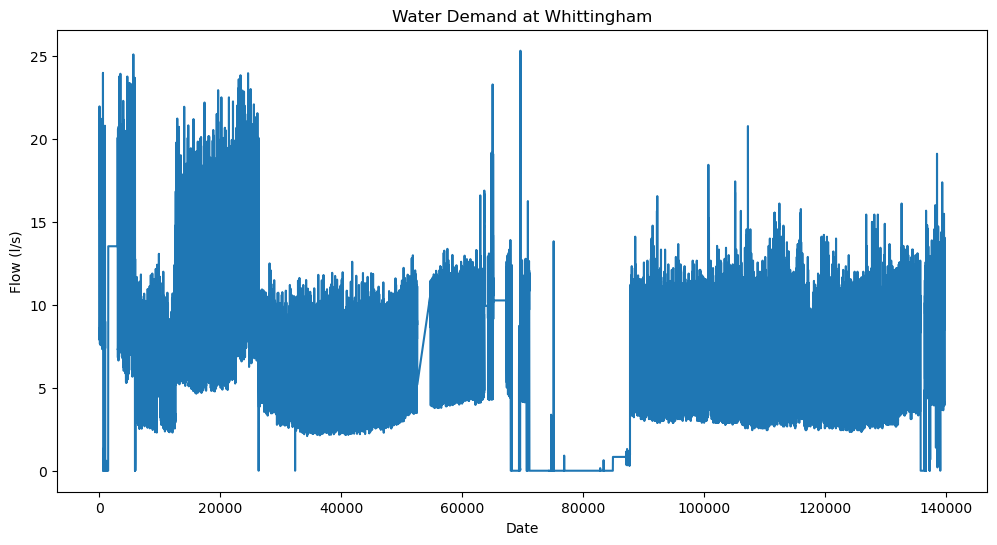

In [31]:
df['Whittingham_Road_Netflow_Stored'].plot(figsize=(12,6))
plt.title('Water Demand at Whittingham')
plt.xlabel('Date')
plt.ylabel('Flow (l/s)')
plt.show()

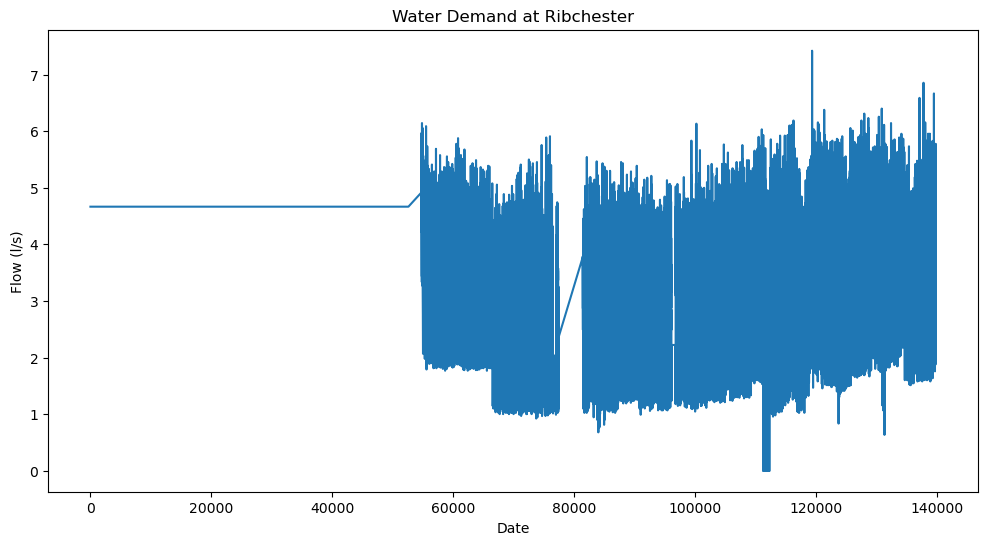

In [32]:
df['Ribchester_Village_Netflow_Stored'].plot(figsize=(12,6))
plt.title('Water Demand at Ribchester')
plt.xlabel('Date')
plt.ylabel('Flow (l/s)')
plt.show()

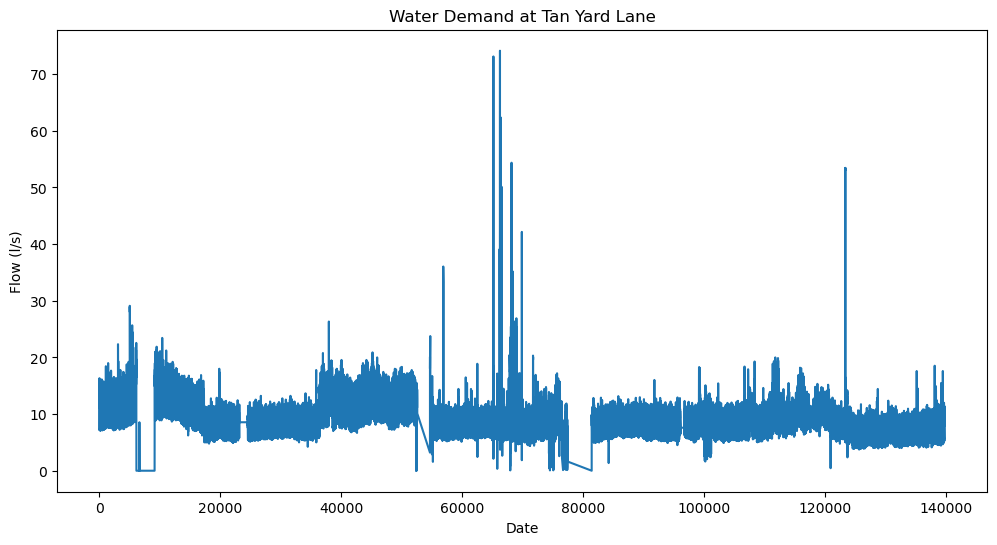

In [33]:
df['Tan_Yard_Lane_Netflow_Stored'].plot(figsize=(12,6))
plt.title('Water Demand at Tan Yard Lane')
plt.xlabel('Date')
plt.ylabel('Flow (l/s)')
plt.show()

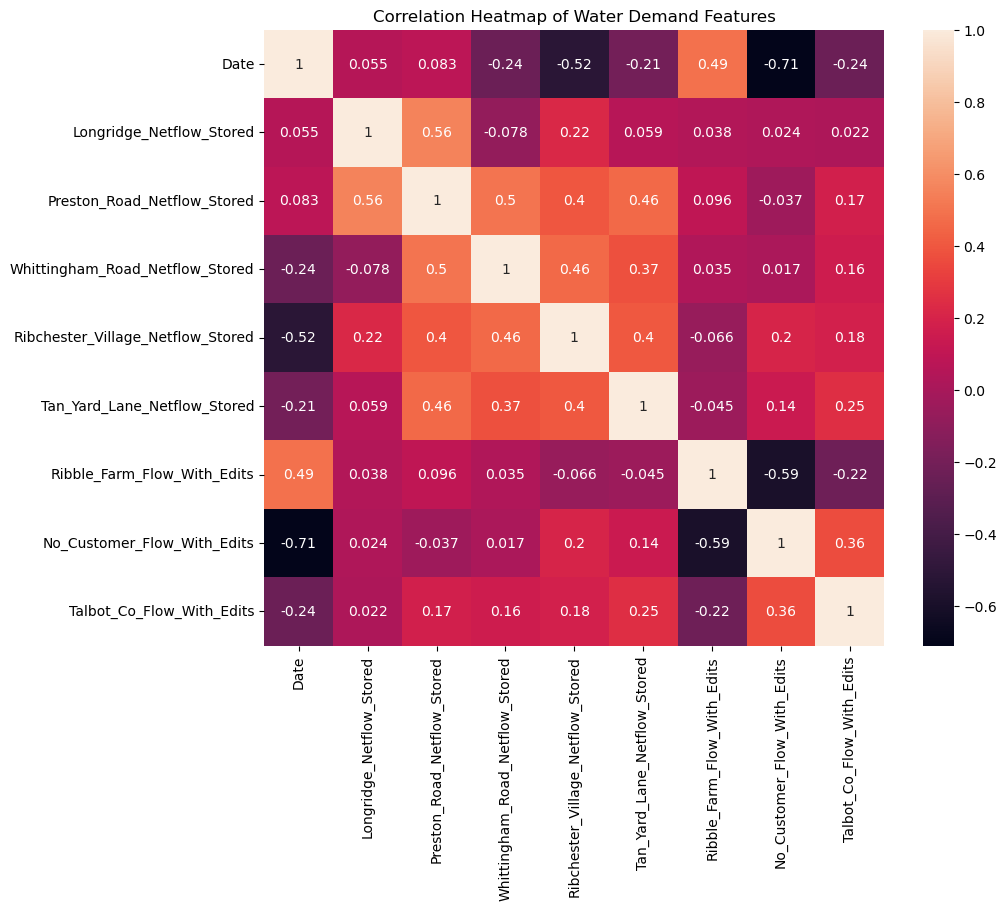

In [34]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap of Water Demand Features")
plt.show()

# Modeling

## Deep learning

## 3. LSTM (Long Short-Term Memory)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np


X = df.drop(['Date', 'Longridge_Netflow_Stored'], axis = 1)
#shifting the values by one to predict the next value. .dropna() is used to remove any NaN values that result from the shift.
y = df['Longridge_Netflow_Stored'].shift(-1).dropna().values  # Target (next step)

X = X[:-1]  # Remove last value to match length of y bc of the shift

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

n_past = 96
batch_size = 100
num_feature = 5

model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(128,  return_sequences=True))
model.add(Dropout(0.3)) #regularization
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Predicting
y_pred = model.predict(X_test)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 7, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,617 (967.25 KB)

 Trainable params: 247,617 (967.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - loss: 35.2426
Epoch 2/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 11.5169
Epoch 3/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 9.8788
Epoch 4/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 9.4483
Epoch 5/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 8.9880
Epoch 6/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 8.6772
Epoch 7/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 8.5531
Epoch 8/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 8.3606
Epoch 9/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 159s 49ms/step - loss: 8.3748
Epoch 10/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 8.0754
Epoch 11/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - loss: 8.0914
Epoch 12/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 7.9905
Epoch 13/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 7.8264
Epoch 14/25
3250/3250 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - loss: 7.6847
Epoch 15/25

In [39]:
import math 
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print(f'RMSE: {rmse}')

R-squared: 0.5598184923084388
RMSE: 2.9101225277446567


# Simple Machine Learning Models

In [41]:
model_names = ['Linear Regression', 'Random Forest Regressor' ,'XGB' , 'LGM'  , 'Adaboost']
r2_scores = []

def apply_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
    
    print(f"Result:\n")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}") 

In [42]:
df['Log_Longridge_Netflow_Stored'] = np.log(df['Longridge_Netflow_Stored']) + 1

X = df.drop(['Date', 'Longridge_Netflow_Stored'], axis = 1)
y = df['Longridge_Netflow_Stored']

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. Linear Regression

In [45]:
lr = LinearRegression()
apply_model(lr, X_train, y_train, X_test, y_test)

Result:

Mean Squared Error: 5.23283172526062
R-squared: 0.859689119836116


## 2. Random Forest Regressor

In [47]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
apply_model(rf, X_train, y_train, X_test, y_test)

Result:

Mean Squared Error: 0.02684502111659726
R-squared: 0.9992801892476869


## 3. Xtreme Gradient Boosting Regressor

In [49]:
xgb = XGBRegressor(objective='reg:squarederror', n_jobs =-1)
apply_model(xgb, X_train, y_train, X_test, y_test)

Result:

Mean Squared Error: 0.06772362382559628
R-squared: 0.998184088125558


## 4. Light Gradient Boosting Regressor

In [51]:
lgm = LGBMRegressor(objective='regression', n_jobs=-1)
apply_model(lgm, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1763
[LightGBM] [Info] Number of data points in the train set: 103980, number of used features: 8
[LightGBM] [Info] Start training from score 11.495152
Result:

Mean Squared Error: 0.10847905725989997
R-squared: 0.9970912896109368


## 5. Ada Boost Regressor

In [53]:
ada = AdaBoostRegressor(n_estimators=100)
apply_model(ada, X_train, y_train, X_test, y_test)

Result:

Mean Squared Error: 0.41408158170425746
R-squared: 0.988896996074208


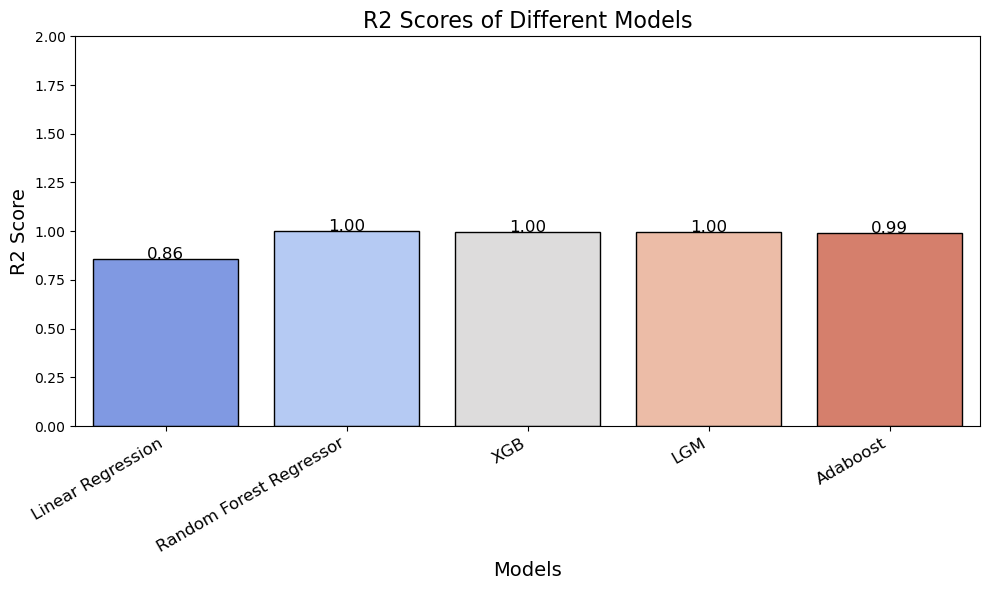

In [54]:
# Create a DataFrame for plotting
import pandas as pd
data = pd.DataFrame({
    'Model': model_names,
    'R2 Score': r2_scores
})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Model', y='R2 Score', palette='coolwarm', edgecolor='black')

# Add labels and title
plt.xlabel('Models', fontsize=14)
plt.ylabel('R2 Score', fontsize=14)
plt.title('R2 Scores of Different Models', fontsize=16)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.ylim(0, 2)  # R2 scores range from 0 to 1

# Add R2 score labels on top of the bars
for index, row in data.iterrows():
    plt.text(index, row['R2 Score'], f"{row['R2 Score']:.2f}", ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Actual vs Predictions')

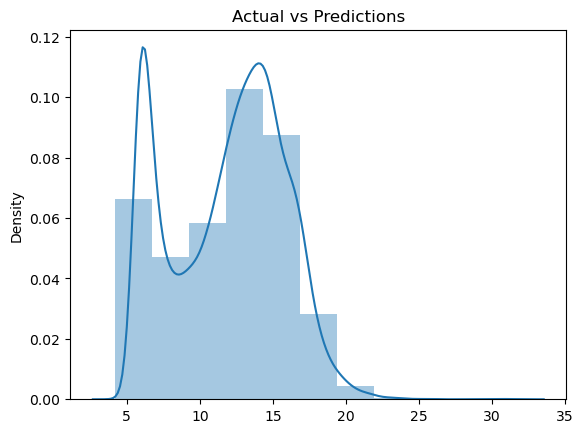

In [55]:
sns.distplot((y_pred),bins=11)
plt.title('Actual vs Predictions')